In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as ptchs
import matplotlib as mpl

from integration import *
from functions import *

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

In [40]:
def fac(x):
    if (x == 0):
        return 1
    return x*fac(x-1)

def choose(n,x):
    """
    Returns the number of combinations available to a set of x things chosen from a superset
    of n things
    """
    return fac(n)/(fac(x)*fac(n-x))

def permute(n,x):
    
    return fac(n)/fac(n-x)

def bi(x,n,p,q):
    """
    Calculates the binomial probability P(x) given number of trials n, 
    probability of success p, and of failure q
    """
    return choose(n,x)*(p**x)*(q**(n-x))


def bycase(funcs: list[function], cases: list[function]):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-40-8da5f8989f24>, line 26)

In [41]:
1-bi(0,15,1/6,5/6)

NameError: name 'bi' is not defined

In [42]:
f = lambda x,k,θ: ((k*θ**k)/x**(k+1)) if x>=θ else 0

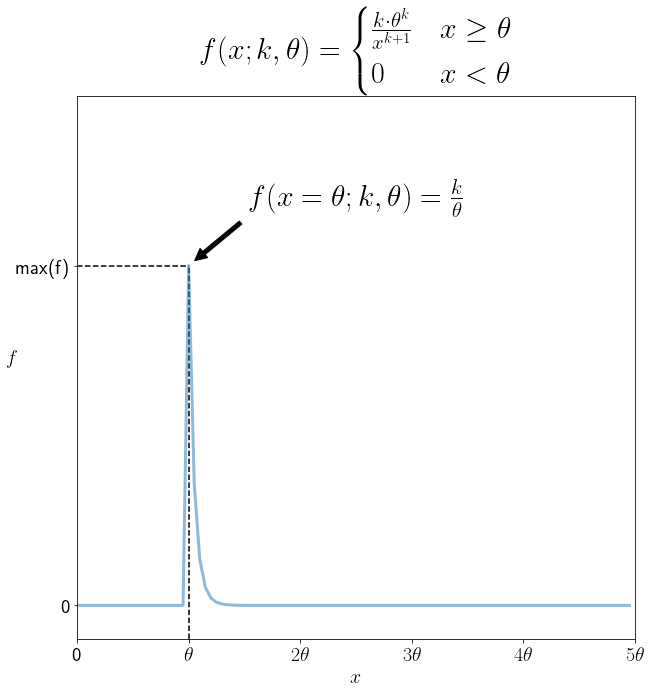

In [43]:
dom = 100
x = range(dom)
y = [f(x,20,20) for x in x]

fig,ax = plt.subplots(1,1, figsize = (10,10))

ax.plot([20,20], [-.1,max(y)], '--k')
ax.plot([0,20], [max(y),max(y)], '--k')
ax.plot(range(100),y, linewidth = 3, alpha = 0.5)
ax.annotate(r"$f(x=\theta; k, \theta) = \frac{k}{\theta}$", 
            xy = (20,max(y)),textcoords = 'offset points',  xytext = (60,60),  
            arrowprops = dict(facecolor = 'black', shrink=0.1) ,fontsize = 30)



ax.axes.get_xaxis().set_ticks(list(range(0,dom+20,20)))
ax.axes.get_yaxis().set_ticks([0,max(y)])
ax.axes.get_xaxis().set_ticklabels(["0",r"$\theta$",r"$2\theta$",r"$3\theta$",r"$4\theta$",r"$5\theta$"])
ax.axes.get_yaxis().set_ticklabels(["0",r"max(f)"])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f$", rotation = 0)
ax.set_title(r'$\displaystyle f(x;k, \theta) =' r'\begin{cases}\frac{k\cdot \theta^k}{x^{k+1}} & x\ge \theta\\ 0 & x<\theta \end{cases}$')
plt.xlim([0,100])
plt.ylim([-.1,max(y)+.5])
plt.show()

In [44]:
a = lambda x,y :1
b = lambda x :2

In [45]:
[a,b]

[<function __main__.<lambda>(x, y)>, <function __main__.<lambda>(x)>]

In [46]:
type(np.linspace(0,10))

numpy.ndarray

In [47]:
list(range(0,100,10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [48]:
max(y)

1.0

In [49]:

#constructing a normal from this data looks like something that could be useful in the future, so ill build a class for it:
class Discrete_Norm:
    
    
    
    
    def __init__(self,data, zscores = None):
        self.data = data
        self.zscores = zscores
        self.mean = None
        self.std = None
        self.func = None
        self.e = 2.718281828459045235360287471352
        self.ecc = self._construct()
        
        
        
    def _construct(self):
        
        mean_index = None
        comp = 0
        if self.zscores != None:
            for i in enumerate(self.zscores):
                if i[1] == 0. or i[1] == 0:
                    mean_index = i[0]
                    self.mean = self.data[mean_index]
                    self.std = sigfo(self.data[0], self.mean, self.zscores[0])
                    comp +=1
                    break
                    
        #could not determine mean and std from zscores, determine otherwise. (TODO)
        if (comp == 0):
            pass
        
        #mean and std are defined
        if (comp == 1):
            self.func =  lambda x : ( 1 / ( np.sqrt(2*np.pi)*self.std ) ) * self.e**( - ( (x - self.mean)**2 ) / (2*self.std**2) ) 
            comp +=1
            
        if (comp == 2):
            return self._determine_ecc()
        
        #if we reach this point, construction failed somewhere, print the point it failed at
        print(f"Construction of discrete normal distribution failed, exit code {comp}") 
        return None
    
    def _determine_ecc(self):
        
        if self.zscores is not None:
            return sum([self.zscores[i] - self.zscore(self.data[i]) for i in range(len(self.data))])/len(self.data)
    
    def zscore(self, dpoint):
        
        return (dpoint - self.mean)/self.std
    

In [312]:
class Distribution:
    
    def __init__(self):
        self.e = 2.718281828459045235360287471352
    
class Discrete_Distribution(Distribution):
    pass
    
    
class Continuous_Distribution(Distribution,Distribution_Plot):
    pass

##############################################

class Weibull_Distribution(Continuous_Distribution):
    
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
        
        self.pdf = lambda x : (alpha/(beta**alpha))*(x**(alpha-1))*self.e**(-(x/beta)**alpha)
        self.cdf = lambda x : 1-self.e**(-(x/beta)**alpha)
        
    def p(self,X, left = True):
        if (type(X) is not list):
            return self.cdf(X) if left else 1-self.cdf(X)
        return self.cdf(X[1])-self.cdf(X[0])
    
    def point_perc(self,percent):
        return self.beta*(-np.log(1-percent))**(1/self.alpha)
    
    
class Gamma_Distribution(Continuous_Distribution):
    
    def __init__(self,alpha,beta=1):
        self.alpha = alpha
        self.beta = beta
        self.e = 2.718281828459045235360287471352
        self.pdf = lambda x : (1/( (beta**alpha) * gamma(alpha) ))*x**(alpha-1)*self.e**(-x/beta)
        self.cdf = lambda x, n : integrate(self.pdf,[0,n])

class ChiSquared_Distribution(Continuous_Distribution):
    pass

class Lognormal_Distribution(Continuous_Distribution):
    pass

class Beta_Distribution(Continuous_Distribution):
    pass

class Exponential_Distribution(Continuous_Distribution):
    
    def __init__(self,lam):
        self.lam = lam
        self.pdf = lambda x : self.lam*e**(-self.lam*x)
        self.cdf = lambda x : 1 - e**(-self.lam*x)
        self.mean = 1/lam
        self.std = self.mean
        self.labels = dict(pdf = r"$f(x;\lambda)=\lambda e^{-\lambda x}$", cdf = r"$F(x;\lambda)=1 - e^{-\lambda x}$", params = [r"$\lambda =$ " + f"{self.lam}"], domain = [r"$\forall x \ge 0$"])

class Normal_Distribution(Continuous_Distribution):
    pass

class Uniform_Distribution(Continuous_Distribution):
    pass

###################################

class Poisson_Distribution(Discrete_Distribution):
    pass

class Binomial_Distribution(Discrete_Distribution):
    pass


In [215]:
Gamma_Distribution(1,1).pdf(1)

0.3678610478127795

In [227]:
class Distribution_Plot:
    
    @staticmethod
    def _plot_loc_lines(start = (0,0), loc = (1,1), style = '--k', axis_base = plt):
        return [axis_base.plot((start[0],loc[0]), (loc[1],loc[1]), style), axis_base.plot((loc[0],loc[0]), (start[1],loc[1]), style)]
    
    def plot(self, x = np.linspace(0,100,10000), plot_pdf = True, plot_cdf = False, plot_mean = False, mean_acc = 2 ,plot_median = False, plot_loclines = True, annotate_aux = False):
        #TODO: determine where to import matplotlib libraries
        #
        
        f = self.pdf(x)
        fig,ax = plt.subplots(1,1, figsize = (14,14))
        ax.grid()
        ax.scatter(x,f, s=0.1, color = 'blue', label = self.labels['pdf'])
        
        if (plot_mean):
            ax.scatter(self.mean,self.pdf(self.mean), s=60, color = 'orange', label = r"$f(\mu_x) =$ " + f"{round(self.pdf(self.mean),int(-np.log10(self.pdf(self.mean)))+mean_acc)}")
            if (plot_loclines):
                self._plot_loc_lines(loc = [self.mean, self.pdf(self.mean)], axis_base = ax)
        #ax.annotate(r"$f(\mu_x) = \cos\left(\frac{\pi - 2}{2}\right) = \sin(1) \approx .84 $", 
        #            xy = (μx,np.cos(μx)), textcoords = 'offset points',  xytext = (40,40),  
        #           arrowprops = dict(facecolor = 'black', shrink=0.1) ,fontsize = 30)

        #

        #ax.scatter(x[index], f[index]) #this provides the same graphical output as below, but we will use the below because it is technically more accurate.
        #ax.scatter(μm,np.cos(μm), s=60, color = 'black', label = r"$f(\widetilde{\mu})$")

        #ax.annotate(r"$f(\widetilde{\mu}) = \cos\left(\frac{\pi}{6}\right) = \frac{\sqrt{3}}{2} $", 
        #            xy = (μm,np.cos(μm)), textcoords = 'offset points',  xytext = (60,80),  
        #            arrowprops = dict(facecolor = 'black', shrink=0.1) ,fontsize = 30)

        #plot_loc_lines(loc = (μm,np.cos(μm)),axis_base = ax)
        #ax.axes.get_xaxis().set_ticks(list(range(0,dom+20,20)))
        #ax.axes.get_yaxis().set_ticks([0,max(y)])
        #ax.axes.get_xaxis().set_ticklabels(["0",r"$\theta$","","","",""])
        #ax.axes.get_yaxis().set_ticklabels(["0",r"max(f)"])
        ax.set_xlabel(r"$x$", labelpad = 20)
        ax.set_ylabel(r"$f(x)$", rotation = 0, labelpad = 60)
        ax.set_title(self.labels['pdf'] + ", " + ", ".join(self.labels['domain']) + ", "  + ",".join(self.labels['params']))

        # legend handling, make changes  to labels or handles here
        handles, labels = ax.get_legend_handles_labels()
        #handles[0] = ptchs.Circle((0,0)) #this doesn't actually give a circle, as mpl recognizes only that the input is a patch, and then uses a rectangular patch instead of using what was input. Someone should look into this, it shouldn't be this way...
        handles[0] = mlines.Line2D([], [], color = 'white', marker='o', markerfacecolor='blue') #scatter point for the distribution plot is too small, change it to a line 
        leg = ax.legend(handles, labels, fontsize = 'xx-large')

        #leg.legendHandles[0] = mlines.Line2D([], [], color='blue') #I thought we would be able to change the legend handles after creating the legend, but this line alone didn't do the trick, perhaps we need to update the ax legend object after this? I'll explore more later
        plt.xlim([x[0], x[-1]+.1])
        plt.ylim([0, max(f)])
        #plt.savefig("P1_sketch.png")
        plt.show()
        
        return fig,ax
    
    

In [231]:
plot_test = Exponential_Distribution(.01)

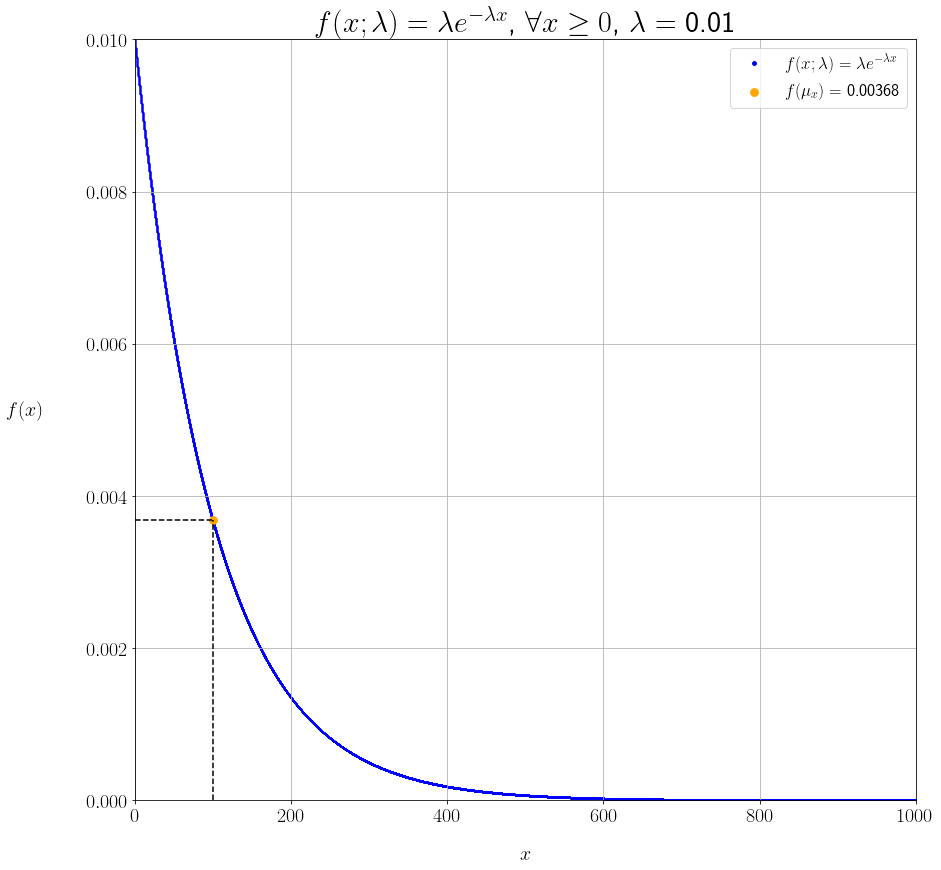

(<Figure size 1008x1008 with 1 Axes>,
 <AxesSubplot:title={'center':'$f(x;\\lambda)=\\lambda e^{-\\lambda x}$, $\\forall x \\ge 0$, $\\lambda =$ 0.01'}, xlabel='$x$', ylabel='$f(x)$'>)

In [233]:
plot_test.plot(x = np.linspace(0,1000,100000), plot_mean = True, mean_acc=3)

In [316]:
from typing import NewType, Pattern
Date = NewType('Date', str)  #re.match(re.compile('(1[0-2]|[0-9]|0[1-9])/([0-2][0-9]|3[0-1]|[1-9])/([1-3][0-9][0-9][0-9])'), "10/1/3999")

In [310]:
type(Date('4/16/2021'))

str

In [317]:
Date(Exponential_Distribution(1))

In [292]:
test = NewType('intt', int)

In [294]:
test("a")

'a'

In [246]:
vars(Pattern)

{'_inst': True,
 '_special': True,
 '_name': 'Pattern',
 '__origin__': re.Pattern,
 '__args__': (~AnyStr,),
 '__parameters__': (~AnyStr,),
 '__slots__': None}

In [247]:
import re

In [301]:
a = re.match(re.compile('[1-12]/[1-31]/[1900-3000]'), '4/16/2021')

TypeError: match() missing 1 required positional argument: 'string'

In [305]:
dir(Pattern)

['__args__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instancecheck__',
 '__le__',
 '__lt__',
 '__module__',
 '__mro_entries__',
 '__ne__',
 '__new__',
 '__origin__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasscheck__',
 '__subclasshook__',
 '__weakref__',
 '_inst',
 '_name',
 '_special',
 'copy_with']

In [287]:
re.match(re.compile('(1[0-2]|[0-9]|0[1-9])/([0-2][0-9]|3[0-1]|[1-9])/([1-3][0-9][0-9][0-9])'), "10/1/3999").group(0)

'10/1/3999'

In [300]:
vars(re.match)

{}

In [318]:
import pandas as pd

In [ ]:
a = pd.DataFrame()